In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from ast import literal_eval

In [ ]:
# from google.colab import files
# import io

# file = files.upload()

# data = pd.read_excel(io.BytesIO(file['one_class_dataset.xlsx']))

In [2]:
# model used for clustering with autoencoder data
def K_means_ae(X, df):
    kmeans = MiniBatchKMeans(n_clusters=3273, random_state=0, verbose=1, batch_size=128)
    model = kmeans.fit(X)
    pred_classes = kmeans.predict(X)

    df['Cluster'] = pred_classes
    df.sort_values(by=['Cluster']).reset_index(drop=True)

    df.index.rename('id', inplace=True)
    df.to_excel("../dataset/kmeans_ae_1.xlsx", index=False)
    #pd.set_option('display.max_rows', None)
    #res.sort_values(by=['cluster'])

In [3]:
# model used for clustering with text
def K_means_text(X, df):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(X)
    kmeans = MiniBatchKMeans(n_clusters=1564, random_state=0, verbose=1, batch_size=128)
    model = kmeans.fit(X)
    pred_classes = kmeans.predict(X)
    X = X.todense()

    embeddings = TSNE(n_components=2)
    Y = embeddings.fit_transform(X)
    plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral, c=model.labels_.astype(float))
    plt.show()

    df['Cluster'] = pred_classes
    df.sort_values(by=['Cluster']).reset_index(drop=True)

    df.to_excel("../dataset/kmeans_2.xlsx", index=False)
    #pd.set_option('display.max_rows', None)
    #res.sort_values(by=['cluster'])

In [8]:
df = pd.read_excel('../dataset/clean_dataset.xlsx')
df

,id,Label_1,Label_2,Original,Quantity,Price,Text
0,0,45,12,#$ACETO.TRIA+SULFNEO+GRAM+NIST POM G LE,1,20.00,ACETOTRIA SULFNEO GRAM NIST POM LE
1,1,45,12,#$ACETO.TRIA+SULFNEO+GRAM+NIST POM G LE,1,20.00,ACETOTRIA SULFNEO GRAM NIST POM LE
2,2,45,12,#$ACETO.TRIA+SULFNEO+GRAM+NIST POM G LE,1,20.00,ACETOTRIA SULFNEO GRAM NIST POM LE
3,3,45,12,#$ACETO.TRIA+SULFNEO+GRAM+NIST POM G LE,1,20.00,ACETOTRIA SULFNEO GRAM NIST POM LE
4,4,291,153,#$BACTRONEO POM 20MG/G C/15G NEOQU,8,30.00,BACTRONEO POM 20MG C 15G NEOQU
...,...,...,...,...,...,...,...
21111,21111,3258,1572,ZYPRED SOL OFT 6ML,2,68.63,ZYPRED SOL OFT 6ML
21112,21112,3258,1572,ZYPRED SOL OFT C/6ML,1,70.84,ZYPRED SOL OFT 6ML
21113,21113,3258,1572,ZYPRED SOL OFT C/6ML,1,70.84,ZYPRED SOL OFT 6ML
21114,21114,3258,1572,ZYPRED SOL OFT C/6ML,1,70.84,ZYPRED SOL OFT 6ML


Init 1/3 with method: k-means++
Inertia for init 1/3: 886.373194
Init 2/3 with method: k-means++
Inertia for init 2/3: 869.274896
Init 3/3 with method: k-means++
Inertia for init 3/3: 875.739837
Minibatch iteration 1/16500: mean batch inertia: 0.159357, ewa inertia: 0.159357 
Minibatch iteration 2/16500: mean batch inertia: 0.160589, ewa inertia: 0.159372 
Minibatch iteration 3/16500: mean batch inertia: 0.134395, ewa inertia: 0.159069 
Minibatch iteration 4/16500: mean batch inertia: 0.158222, ewa inertia: 0.159059 
Minibatch iteration 5/16500: mean batch inertia: 0.156252, ewa inertia: 0.159025 
Minibatch iteration 6/16500: mean batch inertia: 0.184974, ewa inertia: 0.159339 
Minibatch iteration 7/16500: mean batch inertia: 0.107586, ewa inertia: 0.158712 
Minibatch iteration 8/16500: mean batch inertia: 0.165207, ewa inertia: 0.158791 
Minibatch iteration 9/16500: mean batch inertia: 0.137540, ewa inertia: 0.158533 
[MiniBatchKMeans] Reassigning 64 cluster centers.
Minibatch iterati

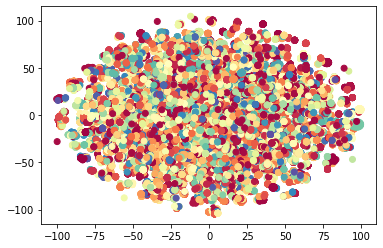

In [9]:
K_means_text(df['Text'], df)

In [ ]:
df = pd.read_excel('../dataset/autoencoder.xlsx')
df

In [ ]:
ae_data = []
for item in df['raw']:
    x = literal_eval(item)
    ae_data.append(x)

In [ ]:
K_means_ae(ae_data, df)